### Codio Activity 3.8: Combining Data Analysis Techniques

This assignment aims to put together our work from module 3.  You are to explore a dataset dealing with customer churn.  Exploratory plots and split-apply-combine techniques will be the main focus of the investigation with the impetus being to identify drivers of customer churn. Churn determines if a customer eliminated their subscription to the telecommunication company. 

#### Index:

- [Problem 1](#Problem-1:-Reading-in-the-Data)
- [Problem 2](#Problem-2:-Exploring-the-Missing-Data)
- [Problem 3](#Problem-3:-Investigating-Churn)
- [Problem 4](#Problem-4:-Plotting-Churn-with-Seaborn)
- [Problem 5](#Problem-5:-Churn-Across-all-Customers)
- [Problem 6](#Problem-1:-Churn-by-International-Plan)
- [Problem 7](#Problem-2:-Selecting-Specific-States)
- [Problem 8](#Problem-3:-International-Minutes-and-Churn)
- [Problem 9](#Problem-4:-pairplot-of-features)
- [Problem 10](#Problem-5:-Customer-Service-Calls-and-Churn)

In [80]:
import plotly.express as px
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Problem 1: Reading in the Data

Read in the dataset as a pandas DataFrame and assign your answer to `churn_df` below.  The dataset is located in the `data` folder and titled `cell_phone_churn.csv`.

In [81]:
churn_df = pd.read_csv('churn.csv')
churn_df.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [82]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   State           3333 non-null   object 
 1   Account Length  3333 non-null   int64  
 2   Area Code       3333 non-null   int64  
 3   Phone           3333 non-null   object 
 4   Int'l Plan      3333 non-null   object 
 5   VMail Plan      3333 non-null   object 
 6   VMail Message   3333 non-null   int64  
 7   Day Mins        3333 non-null   float64
 8   Day Calls       3333 non-null   int64  
 9   Day Charge      3333 non-null   float64
 10  Eve Mins        3333 non-null   float64
 11  Eve Calls       3333 non-null   int64  
 12  Eve Charge      3333 non-null   float64
 13  Night Mins      3333 non-null   float64
 14  Night Calls     3333 non-null   int64  
 15  Night Charge    3333 non-null   float64
 16  Intl Mins       3333 non-null   float64
 17  Intl Calls      3333 non-null   i

In [83]:
churn_df.describe()

,Account Length,Area Code,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [85]:
churn_df['Churn?'] = churn_df['Churn?'].map({'False.': False, 'True.': True})

In [84]:
churn_df['Churn?'].map(lambda x: False if x == 'False.' else True)

0       False
1       False
2       False
3       False
4       False
        ...  
3328    False
3329    False
3330    False
3331    False
3332    False
Name: Churn?, Length: 3333, dtype: bool

In [86]:
churn_df['Churn?']

0       False
1       False
2       False
3       False
4       False
        ...  
3328    False
3329    False
3330    False
3331    False
3332    False
Name: Churn?, Length: 3333, dtype: bool

### Problem 2: Exploring the Missing Data

Use the `.isnull()` method together with the `.sum()` method on the DataFrame `churn_df` determine how many missing values are in each column.  Assign your solution as a pandas Series to `missing_vals` below.

In [87]:
missing_vals = churn_df.isnull().sum()
missing_vals

State             0
Account Length    0
Area Code         0
Phone             0
Int'l Plan        0
VMail Plan        0
VMail Message     0
Day Mins          0
Day Calls         0
Day Charge        0
Eve Mins          0
Eve Calls         0
Eve Charge        0
Night Mins        0
Night Calls       0
Night Charge      0
Intl Mins         0
Intl Calls        0
Intl Charge       0
CustServ Calls    0
Churn?            0
dtype: int64

### Problem 3: Investigating Churn

Use the `.value_counts()` method on the `churn` column of `churn_df` to determine the *percent* (value between 0 and 1) of customers churned and not in the dataset.  Inside `.value_counts()` set the argument `normalize` equal to `True`. Assign your results as a pandas Series to `churn_pct` below.  

In [88]:
churn_pct = churn_df['Churn?'].value_counts()
churn_pct

Churn?
False    2850
True      483
Name: count, dtype: int64

In [89]:
churn_pct0 = churn_df['Churn?'].value_counts()
churn_pct0

Churn?
False    2850
True      483
Name: count, dtype: int64

### Problem 4: Plotting Churn with Seaborn

Use seaborn's `countplot()` on the `churn` column of `churn_df` to visualize the counts of customers churned and not churned.  Save your image as `churn_count.png` to the `images` folder.

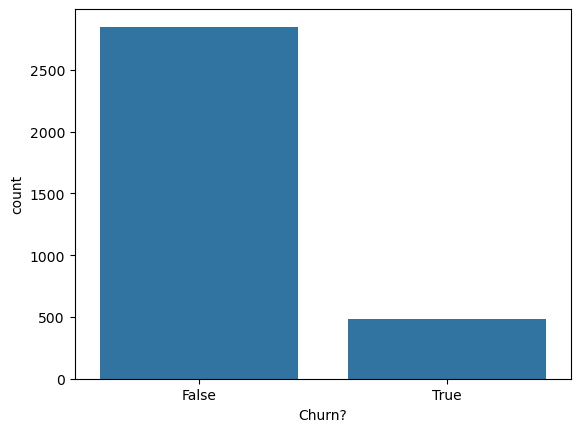

In [90]:
fig = sns.countplot(data = churn_df, x ='Churn?')


### Problem 5: Churn Across all Customers

Based on your results from Problems 3 and 4, are most customers churned or do most stay with the company? 

Assign a boolean of `True` if most are churned and `False` if most stay with the company to the variable `most_churn` below.

In [91]:
most_churn = False

### Problem 6: Churn by International Plan

Use the `groupby` method on the `churn_df` DataFrame to group the `intl_plan` column. Use a double square bracket notation to apply this grouping to the column `churn`. Finally, use the function `mean()` to compute the average churn for each group and assign your response as a DataFrame to `intl_churn` below.  

In [92]:
intl_churn = churn_df.groupby("Int'l Plan")[['Churn?']].mean(numeric_only = True)
intl_churn

,Churn?
Int'l Plan,
no,0.114950
yes,0.424149


### Problem 7: Selecting Specific States

Subset the data to the following five states using the `query` method.  Use the resulting subset to determine the percent churned for each state using the `groupby` method.  Which state had the highest churn rate?  Assign your answer as a string with the two letter abbreviation from the list `states` to `most_churn_ne` below.

```python
states = ['NY', 'MA', 'CT', 'NH', 'ME']
```

In [93]:
states = ['NY','MA','CT','NH','ME']
ne = churn_df.query('State in @states')
ne

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
6,MA,121,510,355-9993,no,yes,24,218.2,88,37.09,...,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False
15,NY,161,415,351-7269,no,no,0,332.9,67,56.59,...,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
31,NH,75,510,370-3359,no,no,0,226.1,105,38.44,...,107,17.13,246.2,98,11.08,10.3,5,2.78,1,False
37,MA,78,415,353-3305,no,no,0,130.8,64,22.24,...,116,19.01,227.8,108,10.25,10.0,5,2.70,1,False
77,NY,144,408,360-1171,no,no,0,61.6,117,10.47,...,85,6.55,173.0,99,7.79,8.2,7,2.21,4,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3296,CT,74,510,380-3186,no,no,0,203.8,77,34.65,...,111,17.43,154.9,109,6.97,9.0,2,2.43,1,False
3297,ME,148,408,347-9995,no,yes,33,241.7,84,41.09,...,84,14.09,160.6,80,7.23,11.3,3,3.05,1,False
3310,NY,94,415,363-1123,no,no,0,190.4,91,32.37,...,107,7.82,224.8,108,10.12,13.6,17,3.67,2,False
3315,ME,149,415,392-1376,no,yes,18,148.5,106,25.25,...,106,9.73,178.3,98,8.02,6.5,4,1.76,0,False


In [94]:
ans = ne.groupby('State')[['Churn?']].mean().value_counts()

In [95]:
ans

Churn?  
0.160714    1
0.162162    1
0.169231    1
0.180723    1
0.209677    1
Name: count, dtype: int64

### Problem 8: International Minutes and Churn

Use the Seaborn function `histplot` to create histograms of the `intl_mins` column with `hue` equal to `churn`.  Save your plot as `intl_mins.png` to the `images` folder.  

Do you think international minutes determine customer churn?  Assign your answer as a string -- `yes` or `no` -- to `intl_min_churn` below.

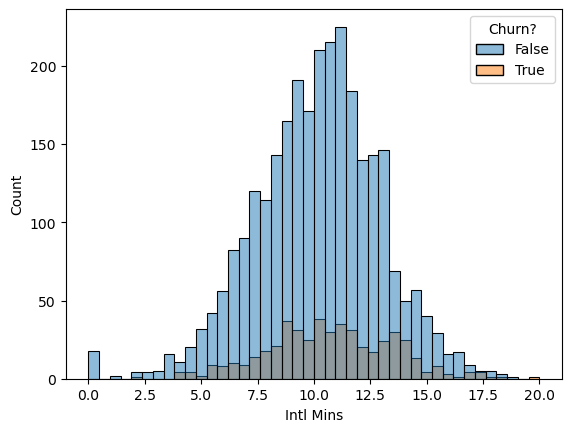

In [96]:
fig = sns.histplot(data = churn_df, x = 'Intl Mins', hue = 'Churn?')

### Problem 9: `pairplot` of features

Use the columns `['night_calls', 'night_charge', 'intl_mins', 'intl_calls', 'intl_charge', 'custserv_calls', 'churn']` to produce a seaborn `pairplot` with `hue` equal to `churn`.  Save your image to `pairplot.png` in the `images` folder.  

In [97]:
col = ['Night Calls', 'Night Charge', 'Intl Mins', 'Intl Calls', 'Intl Charge', 'CustServ Calls', 'Churn?']


In [98]:
df = churn_df[['Night Calls', 'Night Charge', 'Intl Mins', 'Intl Calls', 'Intl Charge', 'CustServ Calls', 'Churn?']]
df.head()

,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,91,11.01,10.0,3,2.70,1,False
1,103,11.45,13.7,3,3.70,1,False
2,104,7.32,12.2,5,3.29,0,False
3,89,8.86,6.6,7,1.78,2,False
4,121,8.41,10.1,3,2.73,3,False


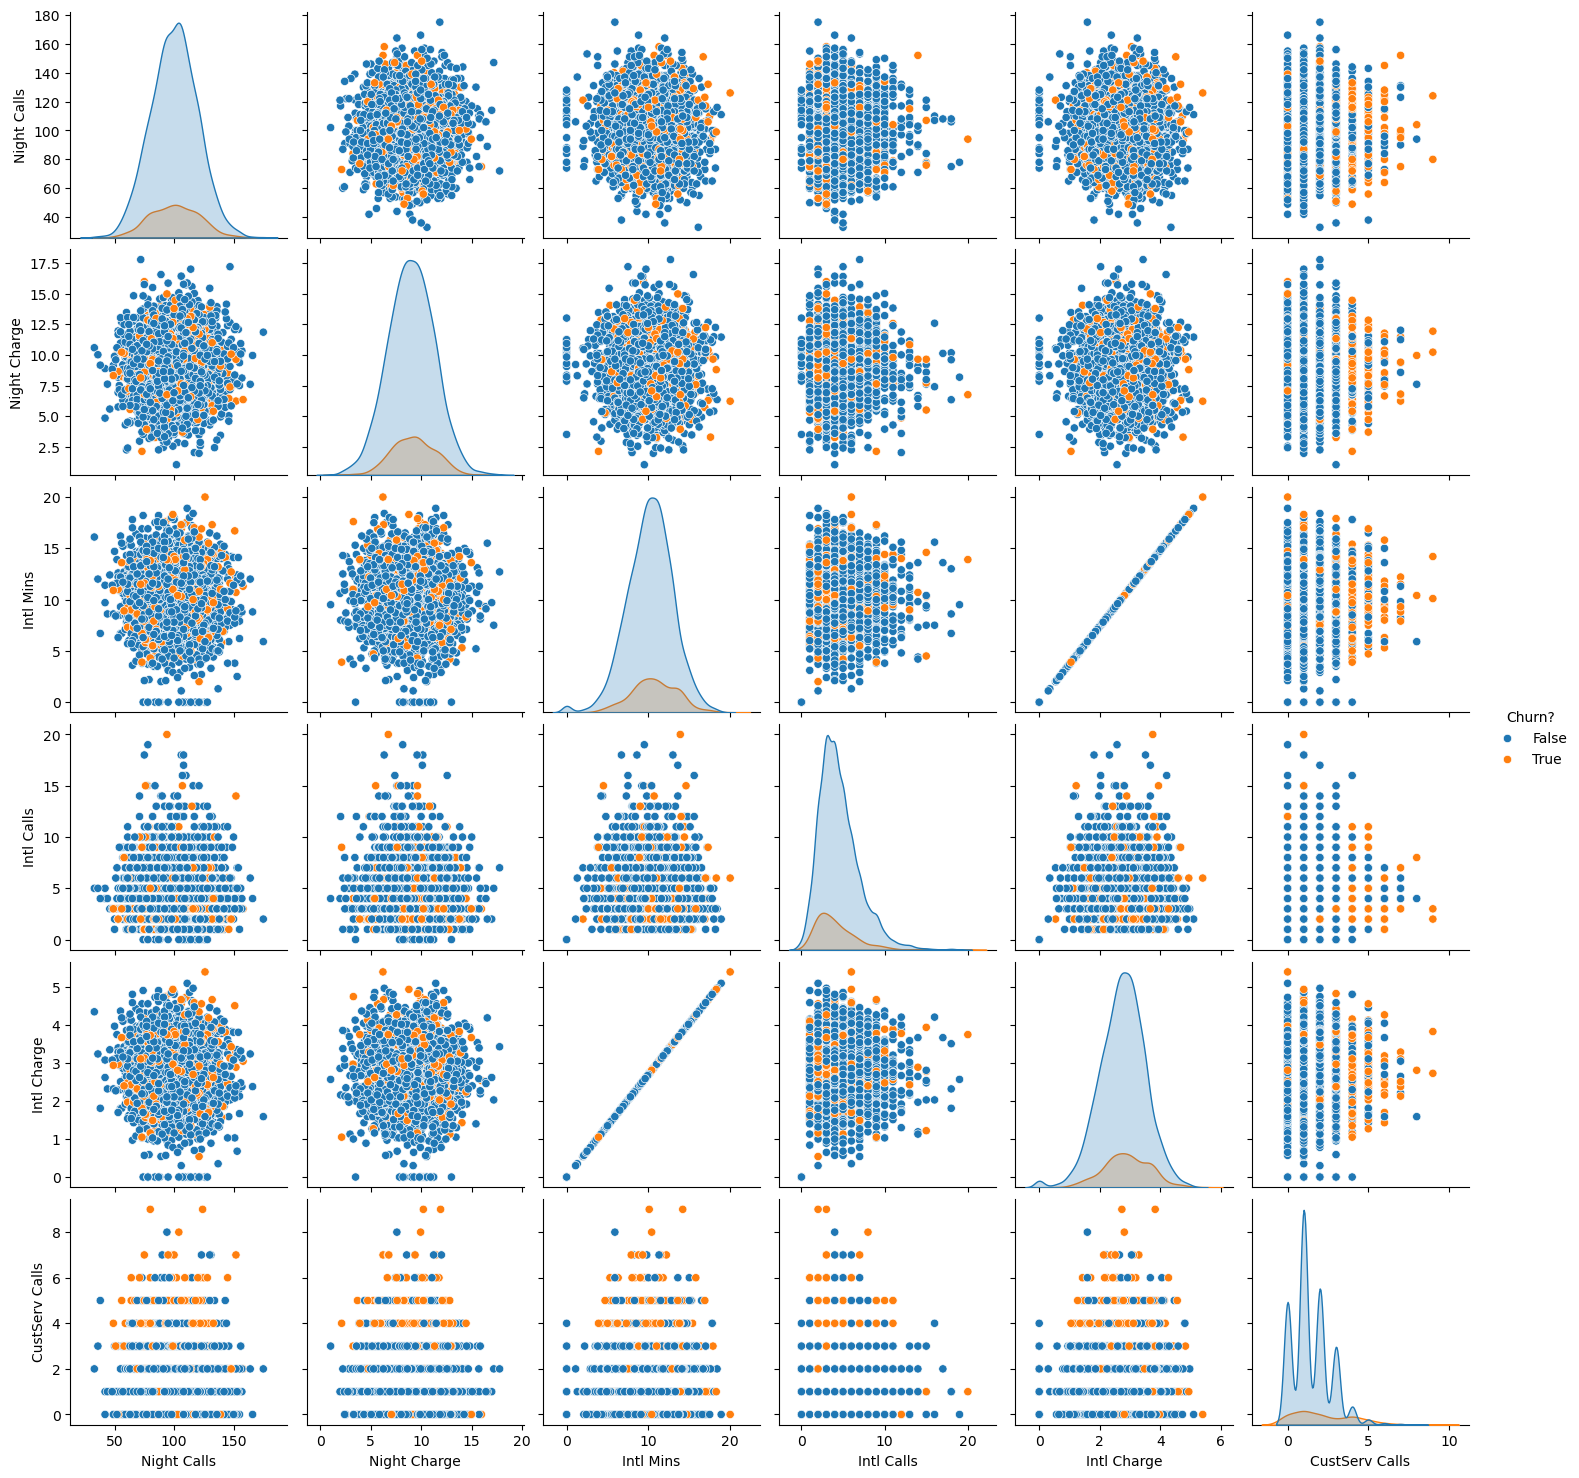

In [99]:
fig = sns.pairplot(data = df, hue = 'Churn?')

### Problem 10: Customer Service Calls and Churn

Use the `groupby` method to split the data by customers who had more than 4 customer service calls.  Use the `mean()` function to determine the average churn rate for each of the groups and assign your result as a DataFrame to `cust_service_churn` below.

In [100]:
df_4 = churn_df[churn_df['CustServ Calls'] > 4]
df_4.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
21,CO,77,408,393-7984,no,no,0,62.4,89,10.61,...,121,14.44,209.6,64,9.43,5.7,6,1.54,5,True
48,ID,119,415,398-1294,no,no,0,159.1,114,27.05,...,117,19.66,143.2,91,6.44,8.8,3,2.38,5,True
54,WY,87,415,353-3759,no,no,0,151.0,83,25.67,...,116,18.67,203.9,127,9.18,9.7,3,2.62,5,True
136,NY,75,415,374-8525,no,yes,21,175.8,97,29.89,...,106,18.49,237.5,134,10.69,5.3,4,1.43,5,False
154,OK,96,415,362-4596,no,no,0,260.4,115,44.27,...,46,12.41,269.5,87,12.13,11.5,4,3.11,5,False


In [101]:
cust_service_churn = churn_df.groupby(churn_df['CustServ Calls'] > 4)[['Churn?']].mean()
cust_service_churn

,Churn?
CustServ Calls,
False,0.130260
True,0.613861
